## Ping-Pong Aktivität

![ping-pong](images/pingpong.png)


Cslovjecsek, M., Guggisberg, M. & Linneweber-Lammerskitten H. (2011). Mathe macht Musik Ping-Pong: Ein arithmetisch-musikalisches Gruppenspiel, PM Praxis der Mathematik 42 (pp. 13 – 18). 

### Bei welcher Zahl komme ich an die Reihe ?

### Wie sieht der Spielplan aus ?
$\mathbb{R} \times \mathbb{R} \times \mathbb{R} \to \mathbb{R}$

$(n, \mbox{Ping-Zahl}, \mbox{Pong-Zahl}) \mapsto \mbox{Position}$






#### Pseudo-Code Ping-Pong Calculation

    p = 0
    step = 1
    for i : 1 .. N do
        p = p + step
        if (i mod ping) xor (i mod pong)
            step = (-1)* step
    return p


In [17]:
def pingpong(n, ping=3, pong=4):
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

ppCalc(5)

3

In [128]:
y = [pingpong(n) for n in range(1,31)]
print y

[1, 2, 3, 2, 3, 4, 3, 2, 3, 2, 1, 0, -1, -2, -3, -2, -3, -4, -3, -2, -3, -2, -1, 0, 1, 2, 3, 2, 3, 4]


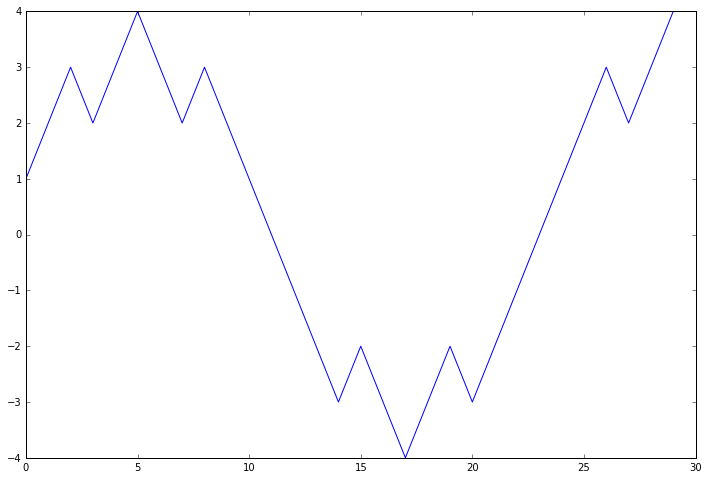

In [129]:
%matplotlib inline
from matplotlib.pyplot import *
fig = figure(figsize=(12, 8))
plot(y)

## Untersuchung der Abhängigkeit von dem Parametern ping und pong

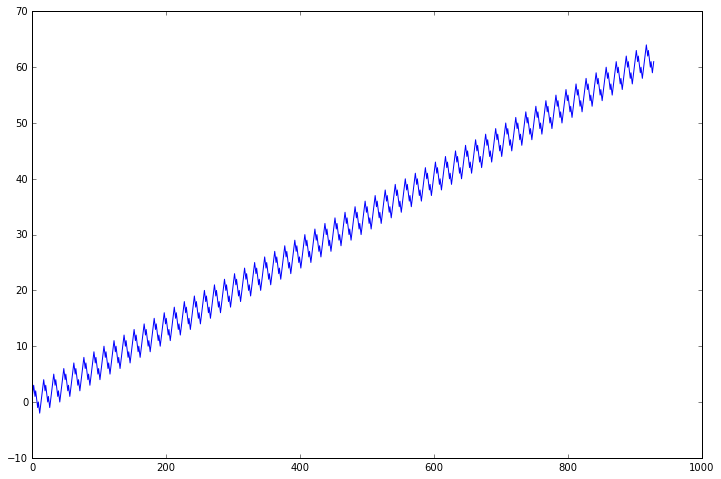

In [36]:
ping = 3
pong = 5
fig = figure(figsize=(12, 8))

y = [pingpong(n,ping,pong) for n in range(1,930)]
plot(y)


### Weitere divergente Konfigurationen

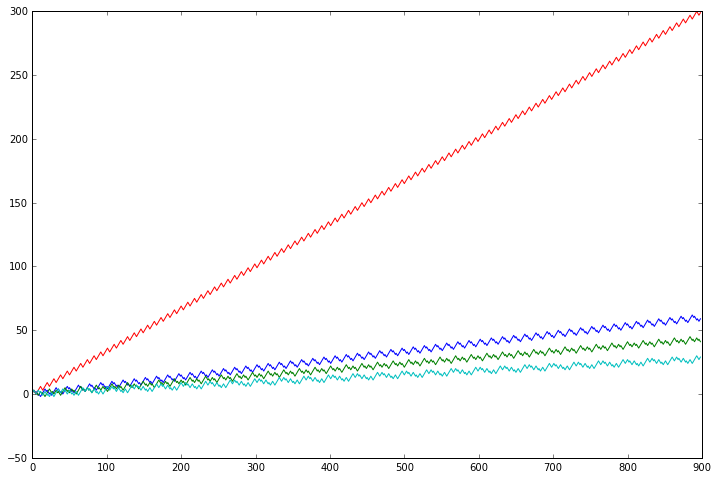

In [46]:
ping = 3
fig = figure(figsize=(12, 8))

y = [[pingpong(n,ping,pong) for pong in range(5,12,2)] for n in range(1,900) ]
plot(y)

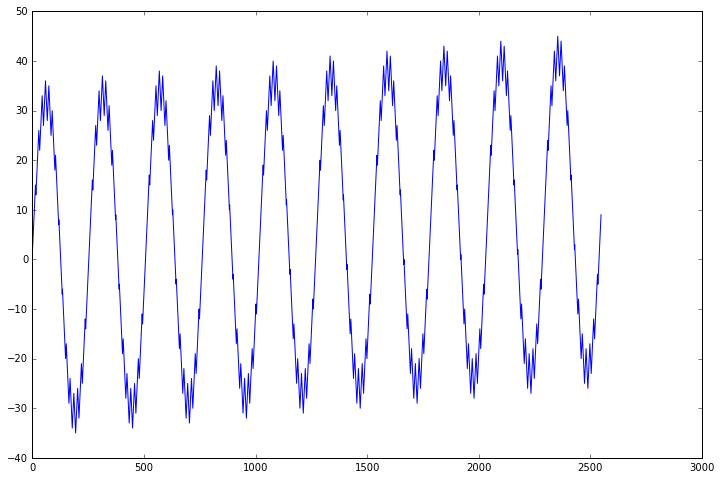

In [48]:
ping=17
pong=15

fig = figure(figsize=(12, 8))
plot([pingpong(n,ping,pong) for n in range(1,10*ping*pong)])

### Ping-Pong Parameter Karte

''

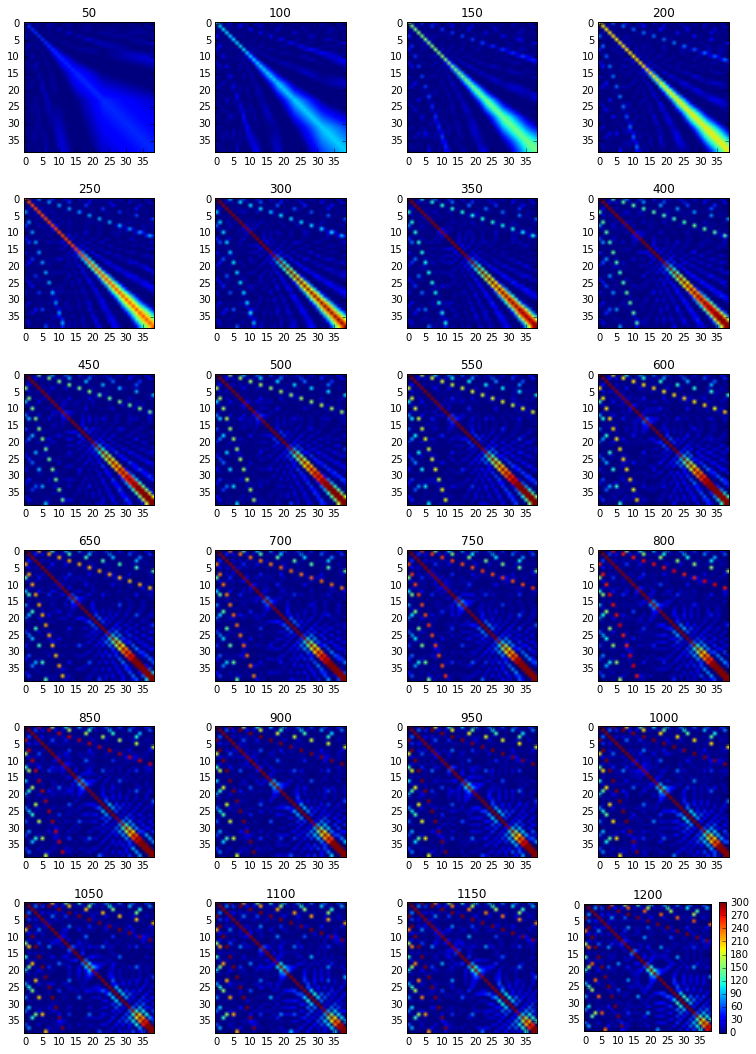

In [127]:
n_col = 4
n_row = 6
dn = 50

figure(figsize=(2.6 * n_col, 2.6 * n_row))

subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

for i in range(1,n_row * n_col+1):
    subplot(n_row, n_col, i)
    title(int(i*dn))
    imshow( [[pingpong(i*dn,k,l) for l in range(2,41)] for k in range(2,41)],vmin=0,vmax=300)

colorbar()
""

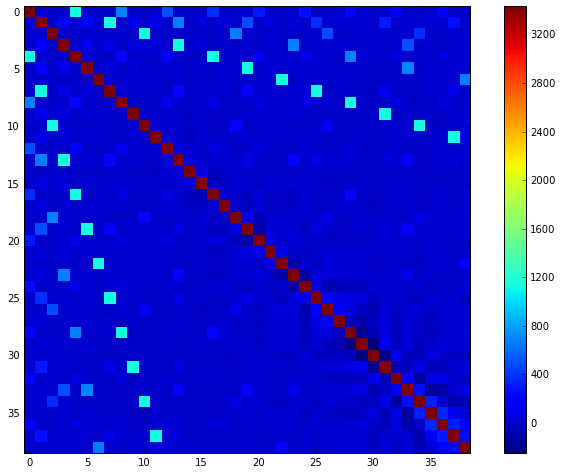

In [62]:
ymap = [[pingpong(3433,k,l) for l in range(2,41)] for k in range(2,41)]

fig = figure(figsize=(12, 8))

imshow(ymap,interpolation="nearest");
colorbar()


Diese Karte zeigt, dass die Fälle, wenn ping ist ein Teiler von pong die Folge rasch divergiert. 

## Nur Fälle berücksichtigen, wenn ping und pong keine gemeinsamen Teiler haben also kgV = 1

In [59]:
from fractions import gcd
def pingpong2(n, ping=3, pong=4):
    if gcd(ping,pong) != 1:
        return -1
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

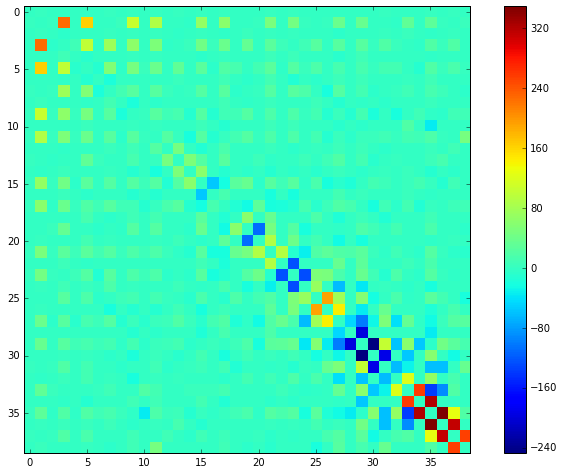

In [61]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41)] for k in range(2,41)]

fig = figure(figsize=(12, 8))

imshow(ymap,interpolation="nearest");
colorbar()

## die Karte zeigt,  dass es weitere divergente Fälle gibt.

Weitere Untersuchungen zeigen, dass ping,pong Zahlenpaare divergieren, wenn beide Zahlen ungerade sind. Die Betrachtung von ausschliesslich geraden und ungeraden Paaren zeigt. 

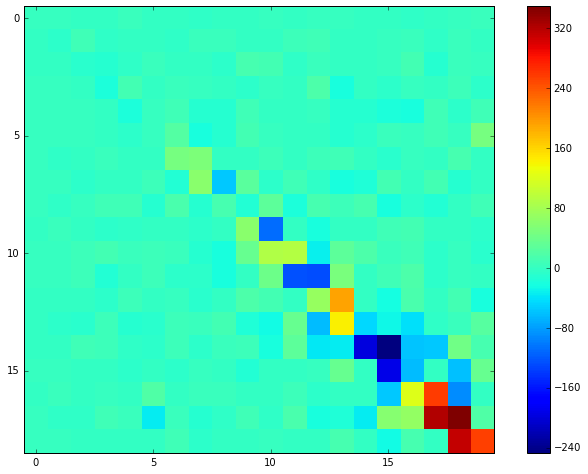

In [63]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41,2)] for k in range(3,41,2)]

fig = figure(figsize=(12, 8))

imshow(ymap,interpolation="nearest");
colorbar()

### Divergieren diese Fälle ?

Mann sieht, dass entlang der Diagonalen die höchsten Werte auftreten.


(39,40) , (39,38) , (39,36) 
(37,40) , (37,38) , (37,36)


''

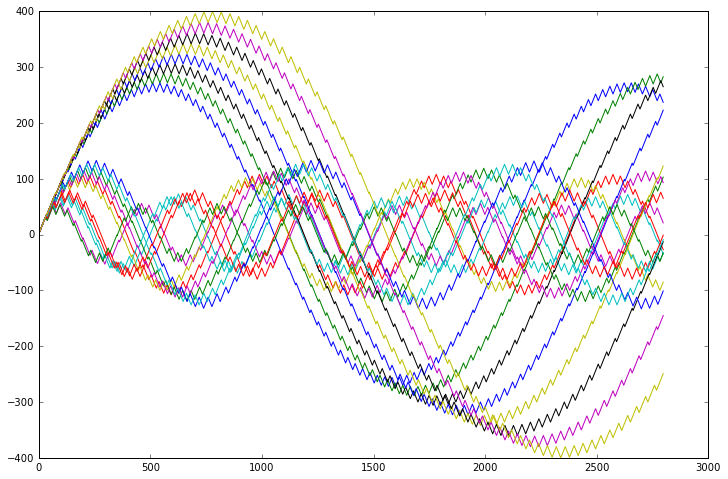

In [126]:
fig = figure(figsize=(12, 8))

y = [[pingpong(n,ping,pong) for ping in range(33,41,2) for pong in range(32,41,2)] for n in range(1,2800) ]
plot(y)

""

### Kombinationen von ungeraden und geraden Paare scheinen periodisch zu oszillieren

Untersuchung zeigt eine Periodizität von $ 2 \cdot ping \cdot pong $

Und eine Amplitude von $ \approx \frac{32}{125} \cdot ping \cdot pong $

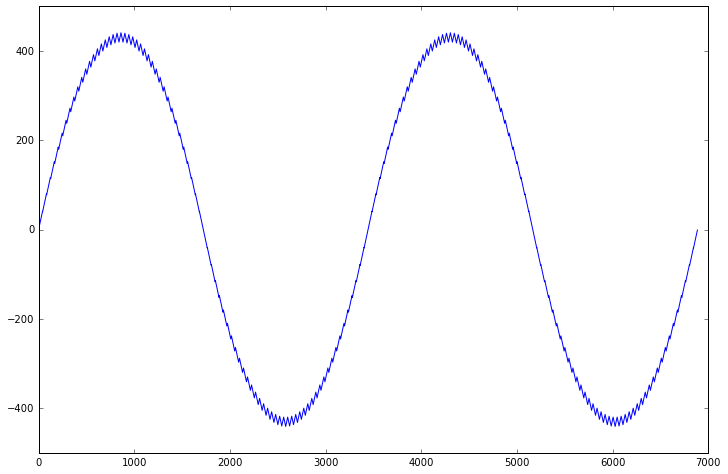

In [94]:
ping = 41
pong = 42 #Torsten

fig = figure(figsize=(12, 8))

y = [pingpong(n,ping,pong) for n in range(1,4*ping*pong) ]
plot(y)





### Vergleich einer normalisierten Ping-Pong Kurve mit einer Sinus Funktion

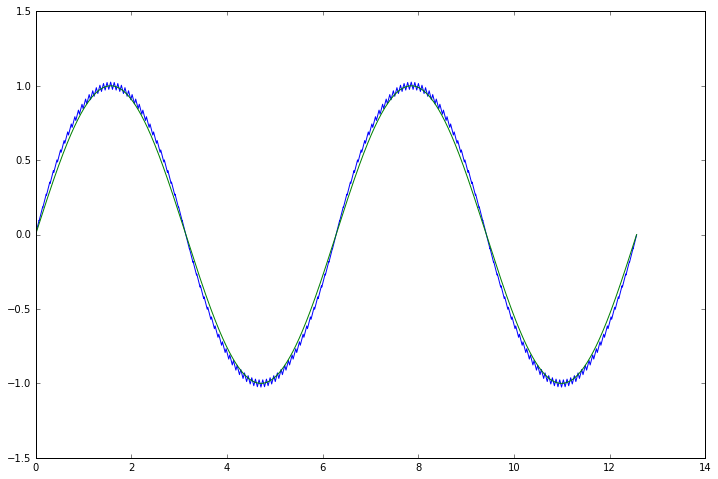

In [121]:
import numpy as np
from math import pi
ping = 41
pong = 42 #Torsten

fig = figure(figsize=(12, 8))

Amplitude = 32.0 / 125 * ping *ping

x = np.linspace(0,4*pi,4*ping*pong-1)
y = np.array([pingpong(n,ping,pong)/Amplitude for n in range(1,4*ping*pong) ])
y2 = np.sin(x)
plot(x,y,'-',x,y2,'-')
